In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/HassanKotb/Machine_Learning/main/Choosing_the_best_fit_polynomical_degree/Advertising.csv')
X=df.drop('sales',axis=1)
y=df.sales

In [17]:
#---------------- Loop Steps -----------------------#
#Make the black Lists for (training / testing ) RMSE
#Make the Degree Ranges
#Polynomial for the whole features
#Fit_transform Poly for the features
#Split the features to (train set / test set )
#Make regression for (traing set / test set)
#Calculate the RMSE for (traint set /test set)
#append RMSE in each list 

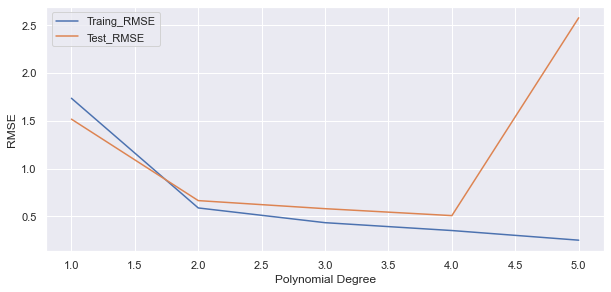

In [16]:
RMSE_TRAINING_LIST = []
RMSE_TEST_LIST = []
for deg in range(1,6):
    poly = PolynomialFeatures(degree = deg , include_bias= False)
    New_features = poly.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(New_features,y,test_size=0.3,random_state = 101)
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    Pred_train = regressor.predict(X_train)
    Pred_test = regressor.predict(X_test)
    Train_RMSE = np.sqrt(mean_squared_error(y_train,Pred_train))
    Test_RMSE = np.sqrt(mean_squared_error(y_test,Pred_test))
    RMSE_TRAINING_LIST.append(Train_RMSE)
    RMSE_TEST_LIST.append(Test_RMSE)

#Ploting the results of the lists     
sns.set()
plt.figure(figsize=(10,4.5))
plt.plot(range(1,6),RMSE_TRAINING_LIST,label = 'Traing_RMSE')
plt.plot(range(1,6),RMSE_TEST_LIST,label = 'Test_RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()  

In [35]:
#Choosing the most suitable polynomical degree(Degree = 4)
Features_converter = PolynomialFeatures(degree=4,include_bias=False)
Features_converter.fit(X)
Pl_ft = Features_converter.transform(X)
Final_Model = LinearRegression()
Final_Model.fit(Pl_ft,y)

LinearRegression()